# Iniciando sessão no pyspark e importando bibliotecas

In [ ]:
pip install pyspark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("Bootcamp").getOrCreate()
sc = spark.sparkContext

In [3]:
from pyspark.sql.types import *

# Definindo tipos e lendo csv do kaggle.
Link da base de dados kaggle: https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data?select=indexData.csv

In [4]:
schema = StructType([
    StructField("Index", StringType(), nullable=False),
    StructField("Date", DateType(), nullable=False),
    StructField("Open", DoubleType(), nullable=True),
    StructField("High", DoubleType(), nullable=True),
    StructField("Low", DoubleType(), nullable=True),
    StructField("Close", DoubleType(), nullable=True),
    StructField("Adj Close", DoubleType(), nullable=True),
    StructField("Volume", IntegerType(), nullable=True),
])

In [5]:

df = spark.read.csv(r"C:\Users\Nicollas\Documents\datasets\indexData.csv", header=True, schema=schema)

In [6]:
df.show()

+-----+----------+----------+----------+----------+----------+----------+------+
|Index|      Date|      Open|      High|       Low|     Close| Adj Close|Volume|
+-----+----------+----------+----------+----------+----------+----------+------+
|  NYA|1965-12-31|528.690002|528.690002|528.690002|528.690002|528.690002|     0|
|  NYA|1966-01-03|527.210022|527.210022|527.210022|527.210022|527.210022|     0|
|  NYA|1966-01-04|527.840027|527.840027|527.840027|527.840027|527.840027|     0|
|  NYA|1966-01-05|531.119995|531.119995|531.119995|531.119995|531.119995|     0|
|  NYA|1966-01-06|532.070007|532.070007|532.070007|532.070007|532.070007|     0|
|  NYA|1966-01-07|532.599976|532.599976|532.599976|532.599976|532.599976|     0|
|  NYA|1966-01-10|533.869995|533.869995|533.869995|533.869995|533.869995|     0|
|  NYA|1966-01-11|534.289978|534.289978|534.289978|534.289978|534.289978|     0|
|  NYA|1966-01-12|533.340027|533.340027|533.340027|533.340027|533.340027|     0|
|  NYA|1966-01-13|534.400024

In [7]:
df.printSchema()

root
 |-- Index: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



# Ajustando os dados

In [9]:
for col in df.columns:
    df = df.withColumnRenamed(col, col.lower())
df = df.withColumnRenamed("adj close", "adj_close")

df.columns

['index', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

# Enviando dados para o MYSQL Server
Conexão feita utilizando o conector jdbc, em seguida escrevemos no banco de dados utilizando df.write.

In [14]:

jdbc_url = "jdbc:sqlserver://localhost:1433;databaseName=datalake_local"
database_name = "datalake_local"

table_name = "test_table"
username = "sa"
password = "123456789"

try:
    df.write \
            .format("jdbc") \
            .option("url", jdbc_url) \
            .option("driver","com.microsoft.sqlserver.jdbc.SQLServerDriver")\
            .option("dbtable", table_name) \
            .option("user", username) \
            .option("password", password) \
            .mode("overwrite") \
            .save()

except ValueError as error:
    print("Erro de conexão", error)

Tabela enviada com sucesso!
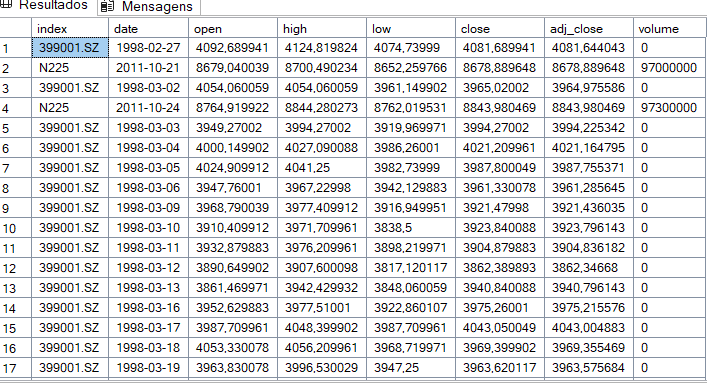